In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams['font.family'] = 'NanumGothic'


# 사이트 연결, 헤더 사용 : 크롤링 접속 차단 대비
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}

# 엑소데이터

In [2]:
# 곡 정보 크롤링 함수
def get_song_info(artist_id):
    html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm='+artist_id, headers=headers).text # 크롤링할 웹사이트 주소 설정
    soup = BeautifulSoup(html, 'html.parser') #데이터 파싱
    
    song_id=[]
    song_title=[]
    
    # song id 찾기
    for a in soup.find_all("tr",attrs= {"class" : "list"}):
        id=a.get('songid')
        song_id.append(id)
    
    # 곡 제목(song title) 찾기
    for a2 in soup.find_all("a",attrs= {"class" : "title ellipsis"}):
        ti=a2.get('title')
        song_title.append(ti)
        song_title = list (filter ( None , song_title)) # 태그가<a>에 class도 같은게 있어서 그런지 none이 자꾸 들어가서 삭제

    return song_id, song_title

In [3]:
# 곡 정보 크롤링 및 가사 데이터 전처리
def get_lyrics(song_id) :
    song_lyrics=[]
    total_listen = []
    total_play = []

    # 문장부호선언
    pun = [',', '.', '?', '!', ':', ';', '(',')','’',r"'"]
    
    # 불용어 텍스트 파일 불러오기
    stopword_list=[]
    with open('k_stopword.txt', 'r', encoding='utf-8') as file:
        stopword_list = file.readlines()
    
    for i in song_id:
        html = requests.get('https://www.genie.co.kr/detail/songInfo?xgnm='+i, headers=headers).text # 크롤링할 웹사이트 주소 설정
        soup2 = BeautifulSoup(html, 'html.parser')

        lyrics=soup2.find("pre",id="pLyrics").find('p').text
    
        # 가사 앞뒤...사이사이 공백제거, splitlines은 문자열 내 개행문자 빼고 리스트로 돌려줌 -> 다시 조인
        lyrics=lyrics.splitlines()
        lyrics=" ".join( lyrics)
    
        # 가사에 있는 문장부호 제거
        lyrics = re.sub('|'.join(map(re.escape, pun)), '', lyrics)
        song_lyrics.append(lyrics)
                
        # 가사에 있는 불용어 제거
        song_lyrics2 = []
        for token in song_lyrics: 
            if token not in stopword_list: 
                song_lyrics2.append(token)
                
        # 전체 청취자수, 재생수 찾기
        total_info = soup2.find('div', class_='total').text.split()
        total_info1 = re.sub('|'.join(map(re.escape, pun)), '', total_info[0])
        total_listen.append(int(total_info1))
        total_info2 = re.sub('|'.join(map(re.escape, pun)), '', total_info[1])
        total_play.append(int(total_info2))
    return song_lyrics2, total_listen, total_play

In [4]:
# 앨범 정보 크롤링 함수
def get_album(artist_id) :
    html = requests.get('https://www.genie.co.kr/detail/artistAlbum?xxnm='+artist_id, headers=headers).text
    soup = BeautifulSoup(html, 'html.parser')
    
    # 빈 리스트 만들기
    album_num=[]
        
    # 곡 형태별 수 찾기
    for num in soup.find_all("em"):
        album_num.append(int(num.text))
                            
    # 숫자가 0인 값 빼기
    album_num=list(filter((0).__ne__, album_num))
    
    return album_num

In [5]:
# 전체 곡 수 크롤링 함수
def get_songs(artist_id) :
    # 크롤링할 웹사이트 주소 설정
    html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm='+artist_id, headers=headers).text
    soup = BeautifulSoup(html, 'html.parser')
    
    # 빈 리스트 만들기
    songs_num = int(soup.find('em').text)
    
    return songs_num

In [6]:
EXO_id = '80220847' # EXO artist id 선언
EXO_song_id, EXO_song_title = get_song_info(EXO_id) # EXO 곡 정보 크롤링
EXO_song_lyrics, EXO_total_listen, EXO_total_play = get_lyrics(EXO_song_id) # EXO 곡 가사 크롤링
EXO_song_lyrics

['첫눈 오는 이런 오후에 너에게 전화를 걸 수만 있다면 기쁠텐데 벌써 일년이 지났는데 난 아직 미련 가득해서 ＂쓸쓸해＂ 어느새 혼잣말  시계를 되돌려 1년 전으로 갈 수 있다면 마음을 되돌려 지금 우린 달라졌을까 yeah 바보 같은 소리지 그래도 만약  너를 만나면 눈물 차 올라  바보 같은 난 아무 말 못해 말해줘 메리 메리 크리스마스 안녕 잘 지내는거지 눈이 내리면 멍든 가슴이  모두 하얗게 다 덮여지게 될까  미안해 잘해주지 못해  후회만 가득 가득 했던 그 크리스마스  불빛 가득한 거리거리 혼자 걸었어 다들 행복해 보여 너는 언제나 공기처럼 있어줄 거란 착각에 멍청히 보내  내가 너무 미안해       너무 흔한 얘기 지나고 나면 너무 소중해 항상 지나치지 왜 그때는 모르는 걸까 지금은 다를 거야 말해주고파  너를 만나면 눈물 차 올라  바보 같은 난 아무 말 못해 말해줘 메리 메리 크리스마스 안녕 잘 지내는거지 눈이 내리면 멍든 가슴이  모두 하얗게 다 덮여지게 될까  눈물인지 눈 때문인지 점점 너 멀리 멀리 보이던 그 크리스마스  정말 신기한 일이야 너의  생각만으로 눈물 차 흐르니말야 Tears are falling falling falling 다시 너에게로 가고 싶어  무슨 일이든 할 수 있어 지금까지 삶이 모두 사라진다 해도 Girl  너를 만나면 눈물 차 올라  바보 같은 난 아무 말 못해 말해줘 메리 메리 크리스마스 안녕 잘 지내는거지 Baby girl ooh- yeah- 눈이 내리면 멍든 가슴이  모두 하얗게 다 덮여지게 될까  미안해 잘해주지 못해 후회만 가득 가득 했던  너를 만나면 눈물 차 올라 눈물 차 올라   아무 말 못해 아무 말 못하는 나 인걸 말해줘 메리 메리 크리스마스 잘 지내는거지 눈이 내리면 멍든 가슴이 모두 하얗게 다 덮여지게 될까  눈물인지 눈 때문인지 점점 너 멀리 멀리 보이던  그 크리스마스',
 '제발 이제 그만  밤이 눈을 멀게 끔 하니 넌 또 몰래 숨어들었지 잠든 귓가 쓱 핥다 쳐다보다 할퀴곤 웃어대  끝

In [7]:
EXO_final = pd.DataFrame({'곡 번호':EXO_song_id, '곡 제목':EXO_song_title, '가사':EXO_song_lyrics})
EXO_final

,곡 번호,곡 제목,가사
0,82145527,첫 눈,첫눈 오는 이런 오후에 너에게 전화를 걸 수만 있다면 기쁠텐데 벌써 일년이 지났는데...
1,89655988,Obsession,제발 이제 그만 밤이 눈을 멀게 끔 하니 넌 또 몰래 숨어들었지 잠든 귓가 쓱 핥...
2,90128240,Confession,Yo I Just wanna know you Time for confession T...
3,82145523,12월의 기적 (Miracles in December),보이지 않는 널 찾으려고 애쓰다 들리지 않는 널 들으려 애쓰다 보이지 않던 게...
4,82145524,Christmas Day,설렘에 부풀어 눈을 뜨는 아침 선물의 리본끈을 풀어보는 느낌 너를 알아가는 날이면 ...
5,88468830,Love Shot,차갑도록 서롤 겨눈 채 날이 선 듯 그 목소리엔 숨막히는 것만 가득해 Oh oh o...
6,88350489,Tempo,I cant believe 기다렸던 이런 느낌 나만 듣고 싶은 그녀는 나의 멜로디 ...
7,81992735,으르렁 (Growl),yo okay 나 혹시 몰라 경고하는데 지금 위험해 자꾸 나를 자극하지마 나도 날...
8,84215866,LOVE ME RIGHT,Oh Yeah Cmon Take your time 왠지 두근대는 밤이야 Na Na...
9,81922644,나비소녀 (Don't Go),조그만 날갯짓 널 향한 이끌림 나에게 따라오라 손짓한 것 같아서 애절한 눈빛과 무...


In [8]:
EXO_popul = pd.DataFrame({'제목':EXO_song_title, '전체 청취자':EXO_total_listen, '전체 재생':EXO_total_play})

In [9]:
EXO_album_num = get_album(EXO_id)
EXO_album_df = pd.DataFrame(EXO_album_num, columns=['엑소'],index=['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'])
EXO_album_df

,엑소
전체앨범,54
정규앨범,12
싱글/EP,10
기타앨범,5
참여앨범,27


In [10]:
EXO_songs_num = get_songs(EXO_id)
EXO_songs_num

418

## 트와이스 데이터

In [11]:
TW_id = '80463902' # TWICE artist id 선언
TW_song_id, TW_song_title = get_song_info(TW_id) # TWICE 곡 정보 크롤링
TW_song_lyrics, TW_total_listen, TW_total_play = get_lyrics(TW_song_id) # TWICE 곡 가사 크롤링

In [12]:
TW_final = pd.DataFrame({'곡 번호':TW_song_id, '곡 제목':TW_song_title, '가사':TW_song_lyrics})
TW_final

,곡 번호,곡 제목,가사
0,91165220,I CAN'T STOP ME,알람이 울려대 Ring ring a ling 서로의 눈길이 닿을 때마다 알면서 빙빙...
1,91710048,CRY FOR ME,I know 고쳐 쓸 가치도 없단 걸 하지만 그녀와 달리 난 널 쉽게 놔줄 맘이 없...
2,90313511,MORE & MORE,I know I want it 입에 바른 소린 이제 그만할게 Cause I dese...
3,87590605,Merry & Happy,매년 12월 달력을 넘길 때마다 시작되는 그 알 수 없는 허전함은 모른 척을 해봐도...
4,88824340,FANCY,지금 하늘 구름 색은 Tropical yeah 저 태양 빨간빛 네 두 볼 같아 Oh...
5,89378658,Feel Special,그런 날이 있어 갑자기 혼자인 것만 같은 날 어딜 가도 내 자리가 아닌 것만 같고 ...
6,88353506,YES or YES,Hey boy Look Im gonna make this simple for you...
7,88098432,Dance The Night Away,나나나나나나나 나나나나나나나 You and me in the moonlight ...
8,87590604,Heart Shaker,Yeah Yeah Yeah Yeah Come and be my love Come ...
9,87893782,What is Love?,매일같이 영화 속에서나 책 속에서나 드라마 속에서 사랑을 느껴 Um- 사랑을 배...


In [13]:
TW_popul = pd.DataFrame({'제목':TW_song_title, '전체 청취자':TW_total_listen, '전체 재생':TW_total_play})

In [14]:
TW_album_num = get_album(TW_id)
TW_album_df = pd.DataFrame(TW_album_num, columns=['트와이스'],index=['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'])
TW_album_df

,트와이스
전체앨범,35
정규앨범,7
싱글/EP,24
기타앨범,2
참여앨범,2


In [15]:
TW_songs_num = get_songs(TW_id)
TW_songs_num

218

In [16]:
songs_df = pd.DataFrame({'엑소':[EXO_songs_num],'트와이스':[TW_songs_num]},index=['전체곡'])
songs_df

,엑소,트와이스
전체곡,418,218


In [17]:
album_df = EXO_album_df.join(TW_album_df)
album_df

,엑소,트와이스
전체앨범,54,35
정규앨범,12,7
싱글/EP,10,24
기타앨범,5,2
참여앨범,27,2


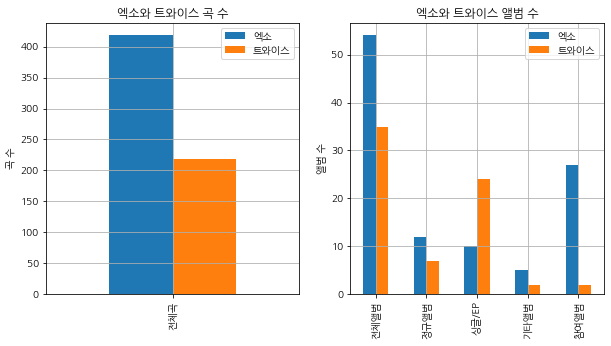

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

songs= songs_df.plot(kind='bar',title="엑소와 트와이스 곡 수", ylabel='곡 수', grid=True, ax=ax[0])
album = album_df.plot(kind='bar',title="엑소와 트와이스 앨범 수", ylabel='앨범 수', grid=True, ax=ax[1])
plt.show()

(0.0, 2500000.0)

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0, flags=flags)


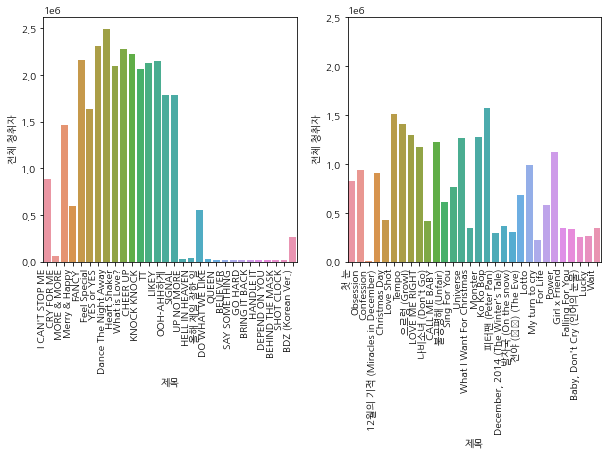

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

sns.barplot(data = TW_popul, x='제목' ,y='전체 청취자', ax=ax[0])
sns.barplot(data = EXO_popul, x='제목' ,y='전체 청취자', ax=ax[1])
fig.autofmt_xdate(rotation=90)
plt.ylim(0,2500000)

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0, flags=flags)


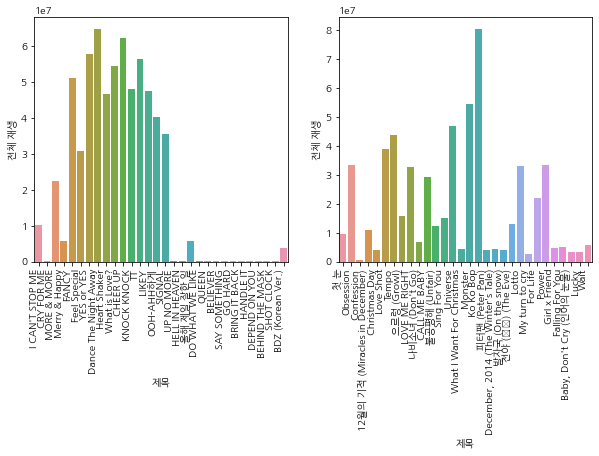

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

sns.barplot(data = TW_popul, x='제목' ,y='전체 재생',ax=ax[0])
sns.barplot(data = EXO_popul, x='제목' ,y='전체 재생', ax=ax[1])
fig.autofmt_xdate(rotation=90)

## 품사태깅

In [22]:
#품사 태깅을 위한 konlpy Import, okt는 한국어 분석기
from konlpy.tag import Okt
twi_tagger = Okt()
from konlpy.utils import pprint

 # 토큰화를 위한 모듈 호출
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer

# 불용어 제거를 위한 모듈 호출
from nltk.corpus import stopwords

# (돈, Noun) -> "돈/Noun" 형태로 바꿈
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [23]:
# 리뷰 단어 리스트 형태로 만드는 함수
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError:
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

In [24]:
# 품사 태깅 함수
def tag_wordclass(artist_final) :
    words=[]
    for review in artist_final["가사"]:
        words += review_to_wordlist(review)
        
    ##문서 탐색을 위한 기능 호출
    words_nltk = nltk.Text(words, name="Words in lyrics")
    
    #단어 단위로 분해 확인
    print(words[:10])
    
    artist_result = words_nltk.vocab().most_common(len(words_nltk.vocab()))
    
    return artist_result

In [25]:
# 품사 태깅
EXO_result = tag_wordclass(EXO_final)
# 데이터 프레임으로 생성
EXO_result = pd.DataFrame(EXO_result);EXO_result[:20]
# 결과로 가장 많이 나온게 ''<-이거인데 버릴지 말지 고민 Let's이런식으로 쓰여서

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


['첫/Modifier', '눈/Noun', '오다/Verb', '이렇다/Adjective', '오후/Noun', '에/Josa', '너/Noun', '에게/Josa', '전화/Noun', '를/Josa']


,0,1
0,너/Noun,164
1,하다/Verb,153
2,을/Josa,129
3,이/Josa,124
4,에/Josa,121
5,나/Noun,109
6,의/Josa,106
7,내/Noun,96
8,I/Alpha,80
9,가/Josa,79


In [26]:
EXO_result.columns = ['word', 'counts']
EXO_result[:10]
#단어와 품사가 합쳐진 것을 나눠줌
EXO_result['단어'], EXO_result['품사'] = zip(*EXO_result.word.map(lambda x: x.split('/')))
EXO_result = EXO_result.drop(['word'], 1)
#보기 좋은 순서로 재배치
EXO_result = EXO_result[['단어', '품사', 'counts']]

In [27]:
#명사만 10위까지 뽑기
Noun = EXO_result['품사'] == "Noun"
EXO_result[Noun][:10]

,단어,품사,counts
0,너,Noun,164
5,나,Noun,109
7,내,Noun,96
11,널,Noun,74
14,네,Noun,60
15,눈,Noun,58
21,그,Noun,53
25,날,Noun,47
28,말,Noun,44
30,난,Noun,43


In [28]:
#동사만 10위까지 뽑기
Verb = EXO_result['품사'] == "Verb"
EXO_result[Verb][:10]

,단어,품사,counts
1,하다,Verb,153
24,보다,Verb,49
33,않다,Verb,41
35,내다,Verb,39
53,되다,Verb,27
68,나르다,Verb,24
71,돼다,Verb,24
76,들다,Verb,22
85,오다,Verb,19
86,모르다,Verb,19


In [30]:
#형용사만 10위까지
Adjective = EXO_result['품사'] == "Adjective"
EXO_result[Adjective][:10]

,단어,품사,counts
22,있다,Adjective,52
26,없다,Adjective,46
37,같다,Adjective,37
91,하얗다,Adjective,18
102,좋다,Adjective,17
111,그렇다,Adjective,16
126,아니다,Adjective,15
238,이렇다,Adjective,8
259,아름답다,Adjective,8
260,영원하다,Adjective,8


## 품사태깅(트와이스)

In [31]:
# 품사 태깅
TW_result = tag_wordclass(TW_final)
# 데이터 프레임으로 생성
TW_result = pd.DataFrame(TW_result);TW_result[:20]
# 결과로 가장 많이 나온게 ''<-이거인데 버릴지 말지 고민 Let's이런식으로 쓰여서

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


['알람/Noun', '이/Josa', '울리다/Verb', 'Ring/Alpha', 'ring/Alpha', 'a/Alpha', 'ling/Alpha', '서로/Noun', '의/Josa', '눈길/Noun']


,0,1
0,하다/Verb,173
1,I/Alpha,163
2,이/Josa,123
3,내/Noun,117
4,을/Josa,109
5,you/Alpha,108
6,me/Alpha,107
7,가/Josa,105
8,knock/Alpha,102
9,너/Noun,91


In [32]:
TW_result.columns = ['word', 'counts']
TW_result[:10]
#단어와 품사가 합쳐진 것을 나눠줌
TW_result['단어'], TW_result['품사'] = zip(*TW_result.word.map(lambda x: x.split('/')))
TW_result = TW_result.drop(['word'], 1)
#보기 좋은 순서로 재배치
TW_result = TW_result[['단어', '품사', 'counts']]

In [33]:
#명사만 10위까지 뽑기
Noun = TW_result['품사'] == "Noun"
TW_result[Noun][:10]

,단어,품사,counts
3,내,Noun,117
9,너,Noun,91
14,더,Noun,68
20,네,Noun,57
22,것,Noun,55
23,날,Noun,53
24,맘,Noun,51
28,나,Noun,46
39,난,Noun,38
50,이,Noun,34


In [36]:
#동사만 10위까지 뽑기
Verb = TW_result['품사'] == "Verb"
TW_result[Verb][:10]

,단어,품사,counts
0,하다,Verb,173
19,않다,Verb,60
34,보다,Verb,42
40,모르다,Verb,38
47,가다,Verb,35
60,보내다,Verb,30
61,싶다,Verb,29
66,버리다,Verb,27
74,되다,Verb,25
75,돼다,Verb,25


In [37]:
#형용사만 10위까지
Adjective = TW_result['품사'] == "Adjective"
TW_result[Adjective][:10]

,단어,품사,counts
13,없다,Adjective,68
15,있다,Adjective,67
36,같다,Adjective,41
49,어떻다,Adjective,35
83,그렇다,Adjective,24
97,원하다,Adjective,21
123,싫다,Adjective,17
126,아니다,Adjective,17
135,이렇다,Adjective,16
143,좋다,Adjective,15


In [38]:
#워드 클라우드
import numpy as np
from wordcloud import WordCloud

#워드클라우드 설정
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',
              background_color="white",
              width=1000,
              height=1000,
              max_words=100,
              max_font_size=300)

In [45]:
def set_wordcloud(artist_result) : 
    # 처음에 조사 제외를 안해줬더니 워드클라우드 결과가 만족스럽지않아서 조사 제외
    word_josa = artist_result['품사'] == "Josa"
    word_j = artist_result[word_josa].index
    artist_word_df = artist_result.drop(word_j)
    artist_word_df.drop('품사', axis = 1, inplace = True)
    artist_list = artist_word_df.values.tolist()
    artist_dict = dict(artist_list)
    
    wc_artist = wc.generate_from_frequencies(artist_dict)
    array_wc_artist = wc_artist.to_array()
    
    return array_wc_artist

In [46]:
EXO_array_wc = set_wordcloud(EXO_result)
TW_array_wc = set_wordcloud(TW_result)

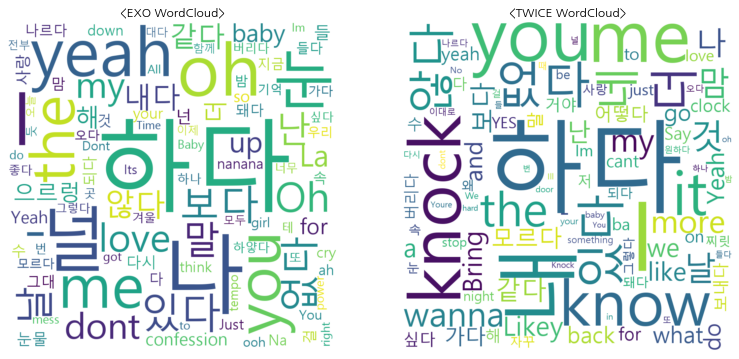

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(13, 13))

ax[0].imshow(EXO_array_wc, interpolation="bilinear")
ax[0].axis('off') # x. y축 숫자 제거
ax[0].set_title("<EXO WordCloud>")

ax[1].imshow(TW_array_wc, interpolation="bilinear")
ax[1].axis('off') # x. y축 숫자 제거
ax[1].set_title("<TWICE WordCloud>")

plt.show()

# 알고리즘 구현

In [53]:
def get_ratio(artist_final) :
    # 엑소 노래별 가사의 단어 종류별 개수 (조사는 무의미하므로 포함 안함)
    cnt_Total = []
    ratio_Noun = []
    ratio_Verb = []
    ratio_Adject = []
    ratio_Alpha = []
    ratio_else = []
    titles = []
    
    #단어를 품사 단위로 (각 가사별로 조사할 예정)
    for review, title in zip(artist_final["가사"], artist_final["곡 제목"]):
        titles.append(title)
        cnt_n = 0
        cnt_v = 0
        cnt_ad = 0
        cnt_al = 0
        cnt_else = 0
        words = []
        words = review_to_wordlist(review)
    
        #전체 단어 수 세기
        cnt_Total.append(len(words))
        
        #각 단어 수 세기
        for word in words:
            tmp = word.split('/')[1]
            if tmp == "Noun": cnt_n += 1
            elif tmp  == "Verb": cnt_v += 1
            elif tmp  == "Adjective": cnt_ad += 1
            elif tmp  == "Alpha": cnt_al += 1
            else : cnt_else += 1
        ratio_Noun.append(round(cnt_n/len(words),3))
        ratio_Verb.append(round(cnt_v/len(words),3))
        ratio_Adject.append(round(cnt_ad/len(words),3))
        ratio_Alpha.append(round(cnt_al/len(words),3))
        ratio_else.append(round(cnt_else/len(words),3))

    artist_df_fin = pd.DataFrame({'곡 제목':titles, '총 단어수':cnt_Total, '명사':ratio_Noun, '동사':ratio_Verb, '형용사':ratio_Adject, '영어':ratio_Alpha, '기타':ratio_else})
    # 곡 제목 따로 저장
    return artist_df_fin

In [54]:
EXO_df_fin = get_ratio(EXO_final)
EXO_df_fin.head()

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


,곡 제목,총 단어수,명사,동사,형용사,영어,기타
0,첫 눈,320,0.456,0.203,0.084,0.034,0.222
1,Obsession,422,0.258,0.201,0.043,0.365,0.133
2,Confession,301,0.153,0.076,0.030,0.664,0.076
3,12월의 기적 (Miracles in December),265,0.453,0.219,0.064,0.004,0.260
4,Christmas Day,221,0.348,0.149,0.063,0.281,0.158


In [55]:
TW_df_fin = get_ratio(TW_final)
TW_df_fin.head()

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


,곡 제목,총 단어수,명사,동사,형용사,영어,기타
0,I CAN'T STOP ME,361,0.224,0.147,0.050,0.438,0.141
1,CRY FOR ME,310,0.229,0.100,0.016,0.519,0.135
2,MORE & MORE,331,0.257,0.169,0.054,0.435,0.085
3,Merry & Happy,234,0.338,0.184,0.124,0.081,0.274
4,FANCY,322,0.363,0.106,0.093,0.335,0.102


In [56]:
# 구분 추가 (엑소인지 트와이스인지 구별)
for i in range(len(EXO_df_fin)):
    EXO_df_fin['구분'] = 0
for i in range(len(TW_df_fin)):
    TW_df_fin['구분'] = 1

In [57]:
# 엑소, 트와이스 데이터 합치기
All_df = pd.concat([EXO_df_fin, TW_df_fin])

In [58]:
# 학습용 데이터 선언
# 문자열, 무의미한 데이터 총 단어수 삭제
All_df.drop('곡 제목', axis = 1, inplace = True) # 문자열이라 삭제
All_df.drop('총 단어수', axis = 1, inplace = True) # 무의미한 데이터라 삭제
All_df.drop('기타', axis = 1, inplace = True) # 무의미한 데이터라 삭제

In [59]:
All_df.head(10)

,명사,동사,형용사,영어,구분
0,0.456,0.203,0.084,0.034,0
1,0.258,0.201,0.043,0.365,0
2,0.153,0.076,0.030,0.664,0
3,0.453,0.219,0.064,0.004,0
4,0.348,0.149,0.063,0.281,0
5,0.225,0.106,0.033,0.497,0
6,0.276,0.147,0.065,0.354,0
7,0.472,0.265,0.038,0.029,0
8,0.299,0.075,0.032,0.428,0
9,0.370,0.167,0.069,0.107,0


c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0, flags=flags)


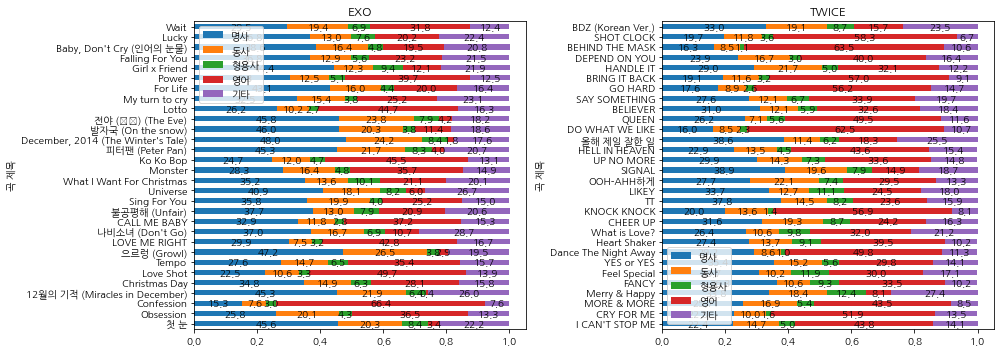

In [60]:
# 엑소, 트와이스 노래 별 품사 비율 비교 그래프 작성
fig, ax = plt.subplots(1,2,figsize=(14,5),tight_layout=True)

EXO_plt = EXO_df_fin.plot(kind='barh', stacked=True, x='곡 제목', y=['명사', '동사', '형용사', '영어','기타'], ax=ax[0])
ax[0].set_title("EXO")
# 수평 막대그래프에 값 표시
for p in EXO_plt.patches:
    left, bottom, width, height = p.get_bbox().bounds
    EXO_plt.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
TW_plt = TW_df_fin.plot(kind='barh', stacked=True, x='곡 제목', y=['명사', '동사', '형용사', '영어','기타'],ax=ax[1])
ax[1].set_title("TWICE")
# 수평 막대그래프에 값 표시
for p in TW_plt.patches:
    left, bottom, width, height = p.get_bbox().bounds
    TW_plt.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

In [88]:
# 데이터들 순서 무작위로 섞어주기
import sklearn
All_df_shuffled = sklearn.utils.shuffle(All_df)
# Train - Test 데이터 나누기 (7:3 비율로)

data_cnt = len(All_df_shuffled)

train_cnt = int(data_cnt*0.7) + 1

Train_df_set = All_df_shuffled[:train_cnt]
Test_df_set = All_df_shuffled[train_cnt:]
print("Train data count : ", len(Train_df_set)) 
print("Test data count : ", len(Test_df_set))  

Train data count :  43
Test data count :  17


In [89]:
# 데이터 셋 준비
X_Train = Train_df_set.drop("구분", axis=1) # 구분 열 버리고 저장
Y_Train = Train_df_set["구분"] # 구분 열 정보만 저장
X_Test = Test_df_set.drop("구분", axis=1).copy() # 구분 열 버리고 저장
Y_Test = Test_df_set["구분"]

In [90]:
# 기계 학습용 패키지 선언
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

#from sklearn.neural_network import MLPClassifier
#from sklearn.feature_extraction.text import CountVectorizer

In [91]:
# 1 - Logistic Regression
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X_Train, Y_Train)

Y_Pred = log_reg.predict(X_Test)
score_log_reg = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_log_reg = round(log_reg.score(X_Train, Y_Train) * 100, 2)
print("Logistic Regression Score : ",score_log_reg)

Logistic Regression Score :  70.59


In [92]:
# 2 - Linear SVC
lin_svc = LinearSVC()
lin_svc.fit(X_Train, Y_Train)

Y_Pred = lin_svc.predict(X_Test)
score_lin_svc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_lin_svc = round(lin_svc.score(X_Train, Y_Train) * 100, 2)
print("Linear SVC Score : ",score_lin_svc)

Linear SVC Score :  64.71


In [93]:
# 3 - Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_Train, Y_Train)

Y_Pred = dec_tree.predict(X_Test)
score_dec_tree = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_dec_tree = round(dec_tree.score(X_Train, Y_Train) * 100, 2)
print("Decision Tree Score : ",score_dec_tree)

Decision Tree Score :  64.71


In [94]:
# 4 - Gaussian Naive Bayes
gaus = GaussianNB()
gaus.fit(X_Train, Y_Train)

Y_Pred = gaus.predict(X_Test)
score_gaus = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_gaus = round(gaus.score(X_Train, Y_Train) * 100, 2)
print("Gaussian Naive Bayes Score : ",score_gaus)

Gaussian Naive Bayes Score :  70.59


In [95]:
# 5 - Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)

Y_Pred = sgd.predict(X_Test)
score_sgd = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
print("Stochastic Gradient Descent Score : ",score_sgd)

Stochastic Gradient Descent Score :  64.71


In [96]:
# 6 - Support Vector Machines
from sklearn.metrics import accuracy_score, confusion_matrix
svc = SVC()
solver = 'liblinear'
svc.fit(X_Train,Y_Train)

Y_Pred = svc.predict(X_Test)
score_svc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
print("Support Vector Machines Score : ",score_svc)

Support Vector Machines Score :  76.47


In [97]:
# 7 - KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_Train, Y_Train)

Y_Pred = knn.predict(X_Test)
score_knn = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_knn = round(knn.score(X_Train, Y_Train) * 100, 2)
print("KNN Score : ",score_knn)

KNN Score :  76.47


In [98]:
# 8 - Random Forest
ran_fore = RandomForestClassifier(n_estimators = 100)
ran_fore.fit(X_Train, Y_Train)

Y_Pred = ran_fore.predict(X_Test)
score_ran_fore = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_ran_fore = round(ran_fore.score(X_Train, Y_Train) * 100, 2)
print("Random Forest Score : ",score_ran_fore)

Random Forest Score :  70.59


In [99]:
# 9 - Perceptron
perc = Perceptron()
perc.fit(X_Train, Y_Train)

Y_Pred = perc.predict(X_Test)
score_perc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_perc = round(perc.score(X_Train, Y_Train) * 100, 2)
print("Perceptron Score : ",score_perc)

Perceptron Score :  76.47


In [100]:
# 최종 결과 스코어 확인
model_res = pd.DataFrame({
    'Model name': ['Logistic Regression', 'Linear SVC', 'Decision Tree', 
                   'Gaussian Naive Bayes', 'Stochastic Gradient Descent', 
                   'Support Vector Machines', 'KNN', 'Random Forest', 
                   'Perceptron'],
    'Score': [score_log_reg, score_lin_svc, score_dec_tree, score_gaus, 
             score_sgd, score_svc, score_knn, score_ran_fore, score_perc]})
model_res.sort_values(by = 'Score', ascending = False)

,Model name,Score
5,Support Vector Machines,76.47
6,KNN,76.47
8,Perceptron,76.47
0,Logistic Regression,70.59
3,Gaussian Naive Bayes,70.59
7,Random Forest,70.59
1,Linear SVC,64.71
2,Decision Tree,64.71
4,Stochastic Gradient Descent,64.71


In [102]:
# SVM 결과 DataFrame
Y_Pred = svc.predict(X_Test)
Y_Result = pd.DataFrame(Y_Test)
Y_Result['예측'] = Y_Pred
result = []

for i in range(0,len(Y_Test)):
        if  Y_Result.iloc[i, 0]== Y_Result.iloc[i,1] : result.append('성공')
        else : result.append('실패')
Y_Result['예측 결과'] =result
Y_Result

,구분,예측,예측 결과
3,0,0,성공
1,0,1,실패
0,0,0,성공
10,0,1,실패
23,1,1,성공
20,0,0,성공
28,0,0,성공
27,1,1,성공
26,1,1,성공
21,1,1,성공


In [103]:
# csv 파일 생성
final_res = pd.DataFrame({
    '명사' : Test_df_set['명사'],
    '동사' : Test_df_set['동사'],
    '형용사' : Test_df_set['형용사'],
    '영어' : Test_df_set['영어'],
    '구분(엑소:0 / 트와이스:1)' : Y_Pred})
final_res.to_csv('Final_Results_TextMining_Assignment.csv', mode = 'w', encoding = 'utf-8-sig', index = False)

In [104]:
final_check = pd.read_csv('Final_Results_TextMining_Assignment.csv')
final_check.describe()

,명사,동사,형용사,영어,구분(엑소:0 / 트와이스:1)
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.321706,0.155647,0.061471,0.286647,0.588235
std,0.092317,0.045355,0.031759,0.190855,0.507300
min,0.163000,0.085000,0.011000,0.004000,0.000000
25%,0.258000,0.121000,0.036000,0.195000,0.000000
50%,0.337000,0.152000,0.059000,0.298000,1.000000
75%,0.368000,0.194000,0.079000,0.372000,1.000000
max,0.458000,0.238000,0.124000,0.635000,1.000000
